## Introduction: 
This is a social networking Advertisments dataset. The dataset is very simple, consisting of two features and a label. 

### Data Dictionary

|Feature |Description|
|:----|:----|
|Age | Age of the Customer |
|Estimated Salary | Estimated Salary of the Customer |
|Puchased | Whether purchased (1) or Not (0) |


### Objective: 
Given the age and estimated salary, whether the customer was persuaded to make the purchase through the company's advertising efforts



## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline 

#### Pre Processing Libraries


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#### Model Selection Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Metrics Libraries

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#### Models Libraries

In [5]:

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression # Linear Model
from sklearn.svm import LinearSVC                   # Linear Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Pipeline Library

In [6]:
from sklearn.pipeline import Pipeline

## Loading dataset

In [7]:
ads = pd.read_csv('Social_Network_Ads.csv')

In [8]:
ads.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
ads.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


## Summary Statistics and Information

In [10]:
ads.shape

(400, 3)

In [11]:
ads.describe(include='all')

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [12]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [13]:
ads.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [14]:
for col in ads.columns:
    unique = ads[col].unique()
    print('{}:\nunique entries: {}'.format(col, unique))

Age:
unique entries: [19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]
EstimatedSalary:
unique entries: [ 19000  20000  43000  57000  76000  58000  84000 150000  33000  65000
  80000  52000  86000  18000  82000  25000  26000  28000  29000  22000
  49000  41000  23000  30000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  79000  54000 135000  89000
  32000  83000  55000  48000 117000  87000  66000 120000  63000  68000
 113000 112000  42000  88000  62000 118000  85000  81000  50000 116000
 123000  73000  37000  59000 149000  21000  35000  71000  61000  75000
  53000 107000  96000  45000  47000 100000  38000  69000 148000 115000
  34000  60000  70000  36000  39000 134000 101000 130000 114000 142000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77000 125000 106000 141000  93000 138000
 119000 105000  99000 129000  460

In [15]:
for col in ads.columns:
    values = ads[col].value_counts(dropna=False, ascending=False)
    print('{}:\n{}'.format(col, values))
    

Age:
35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64
EstimatedSalary:
72000     12
80000     11
79000     10
71000      9
75000      9
          ..
142000     1
100000     1
37000      1
114000     1
64000      1
Name: EstimatedSalary, Length: 117, dtype: int64
Purchased:
0    257
1    143
Name: Purchased, dtype: int64


**Observations:**
- No null values in this dataset
- Our dataset has 3 columns and 400 rows
- All columns are of integer type
- The ages of customers in this dataset range from 18 to 60
- The salaries of customers in this dataset range from USD 15,000 to USD 150,000
- Out of 400 customers, 257 made purchases while 143 did not make any purchases

## Data Exploration

In [16]:
ads['Age'].value_counts(normalize=True, ascending=False).head()

35    0.08
37    0.05
41    0.04
42    0.04
26    0.04
Name: Age, dtype: float64

In [17]:
def age_bracket(age):
    if age >= 18 and age <= 26:
        return '18-26'
    elif age >= 27 and age <= 33:
        return '27-33'
    elif age >= 34 and age <= 42:
        return '34-42'
    elif age >= 43 and age <= 51:
        return '43-51'
    elif age >= 52 and age <= 60:
        return '52-60'
    else:
        return NaN 
    

In [18]:
ads1 = ads.copy()
ads1['age_bracket'] = ads1['Age'].apply(age_bracket)

In [19]:
ads1.age_bracket.value_counts()

34-42    145
27-33     75
43-51     69
18-26     65
52-60     46
Name: age_bracket, dtype: int64

In [20]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

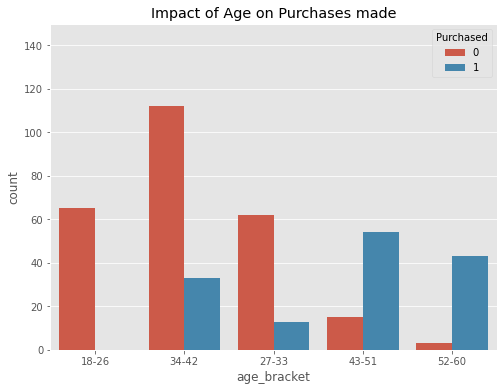

In [21]:
style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='age_bracket', data=ads1, hue='Purchased')
ax.set_ylim(0,150)
plt.title("Impact of Age on Purchases made")
plt.show()

In [22]:
ads1_ab = ads1.groupby('age_bracket').count()['Age']
ads1_ab

age_bracket
18-26     65
27-33     75
34-42    145
43-51     69
52-60     46
Name: Age, dtype: int64

In [23]:
def salary_bracket(salary):
    if salary >= 15000 and salary <= 42000:
        return '15K-42K'
    elif salary > 42000 and salary <= 69000:
        return '42K-69K'
    elif salary > 69000 and salary <= 96000:
        return '69K-96K'
    elif salary > 96000 and salary <= 123000:
        return '96K-123K'
    elif salary >= 123000 and salary <= 150000:
        return '123K-150K'
    else:
        return NaN 
    

In [24]:
ads1['salary_bracket'] = ads1['EstimatedSalary'].apply(salary_bracket)

In [25]:
ads1_sb = ads1.groupby('salary_bracket').count()['EstimatedSalary']
ads1_sb

salary_bracket
123K-150K     38
15K-42K       95
42K-69K      104
69K-96K      125
96K-123K      38
Name: EstimatedSalary, dtype: int64

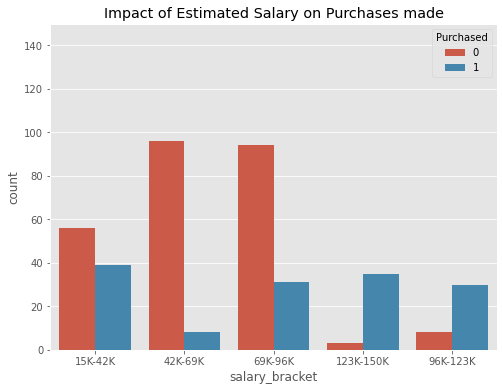

In [26]:
style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='salary_bracket', data=ads1, hue='Purchased')
ax.set_ylim(0,150)
plt.title("Impact of Estimated Salary on Purchases made")
plt.show()

In [27]:
ads.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


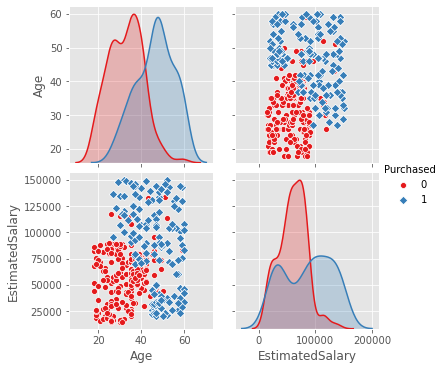

In [28]:
sns.pairplot(ads1, hue='Purchased', kind="scatter", markers=["o", "D"], palette="Set1")
plt.show()

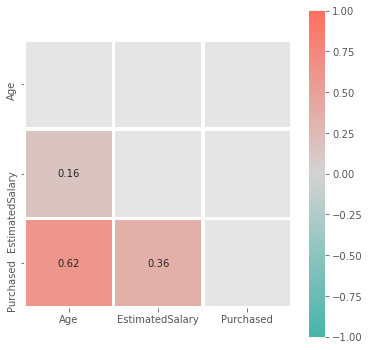

In [29]:
import matplotlib
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
corr = ads1.corr()
colors = ["#45b5aa","lightgray", "#ff6f61"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,
            mask=mask,
            square=True, 
            linewidth=2.5, 
            vmax=1, vmin=-1, 
            cmap=cmap, 
            cbar=True, 
            ax=ax,annot=True)
# please do some nice work on it 
ax.spines['top'].set_visible(True)
plt.show()

In [30]:
# Keep in mind that we still have ads1 as copy as well
ads2 = ads.copy()

## Splitting the Data into Features and Label


In [31]:
X = ads2.loc[:, ['Age', 'EstimatedSalary']]
y = ads2.loc[:, 'Purchased']

In [32]:
X.shape

(400, 2)

In [33]:
y.shape

(400,)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Applying Models

### Logistic Regression

#### Make a Pipeline with Scaler to avoid Data Leakage

In [35]:
lr_pipe = Pipeline([('sc', StandardScaler()), ('lr', LogisticRegression())])

Train Score:
0.840625
Test Score:
0.8625

Accuracy Score:
0.8625


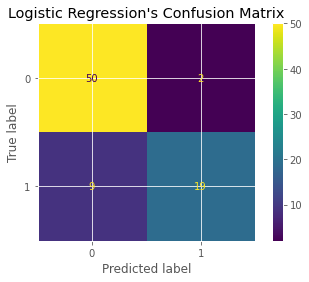

In [36]:
# Train the model
lr_pipe.fit(X_train, y_train)

# Get train and test scores
print('Train Score:\n{}\nTest Score:\n{}'.format(lr_pipe.score(X_train, y_train), lr_pipe.score(X_test, y_test)))

# Predict
y_pred = lr_pipe.predict(X_test)
print('\nAccuracy Score:\n{}'.format(accuracy_score(y_test, y_pred)))

# Plot Confusion Matrix
plot_confusion_matrix(lr_pipe, X_test, y_test)
plt.title('Logistic Regression\'s Confusion Matrix')

plt.show()

In [37]:
lr_pipe.steps

[('sc', StandardScaler()), ('lr', LogisticRegression())]

##### Lets look into the scores of each fold

In [38]:
kfold = KFold(n_splits=10)
print('Cross_validation scores:\n{}'.format(cross_val_score(lr_pipe, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(lr_pipe, X, y, cv=kfold).mean()))


Cross_validation scores:
[0.675 0.9   0.925 0.9   0.925 0.725 0.925 0.75  0.9   0.625]
Mean score = 0.825


##### Lets look into score for each fold with shuffle=True

In [39]:
kfold = KFold(n_splits=10, shuffle=True)
print('Cross_validation scores:\n{}'.format(cross_val_score(lr_pipe, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(lr_pipe, X, y, cv=kfold).mean()))


Cross_validation scores:
[0.875 0.85  0.875 0.85  0.9   0.85  0.825 0.75  0.75  0.925]
Mean score = 0.8400000000000001


### KNN Classifier

#### Make a Pipeline with Scaler to avoid Data Leakage

In [40]:
# Pipeline 
knn_pipe = Pipeline([('sc',StandardScaler()), ('knn', KNeighborsClassifier())])

Train Score:
0.909375
Test Score
0.9125

Accuracy Score : 0.9125


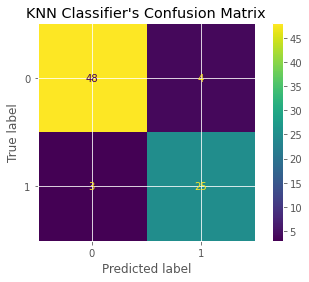

In [41]:
# Train the model
knn_pipe.fit(X_train, y_train)

# Get train and test scores
print('Train Score:\n{}\nTest Score\n{}'.format(knn_pipe.score(X_train, y_train), knn_pipe.score(X_test, y_test)))

# Predict
y_pred = knn_pipe.predict(X_test)
print('\nAccuracy Score : {}'.format(accuracy_score(y_test, y_pred)))

# Plot Confusion Matrix
plot_confusion_matrix(knn_pipe,X_test, y_test)
plt.title('KNN Classifier\'s Confusion Matrix')

plt.show()

##### Lets look into score for each fold

In [42]:
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn_pipe, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(knn_pipe, X, y, cv=kfold).mean()))



Cross-validation scores:
[1.    0.9   0.925 0.925 0.925 0.725 0.925 0.8   0.925 0.875]
Mean score = 0.8925000000000001


##### Lets look into score for each fold with shuffle=True

In [43]:
kfold = KFold(n_splits=10, shuffle=True)
print("Cross-validation scores:\n{}".format(cross_val_score(knn_pipe, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(knn_pipe, X, y, cv=kfold).mean()))

Cross-validation scores:
[0.9   0.95  0.8   0.9   0.925 0.9   0.85  0.925 0.925 0.9  ]
Mean score = 0.89


**Observations:**
- Without using Cross validation, KNClassifier() showed the highest test score of around 91%. However, this score dropped significatly after using cross-validation to around 76%. 
- By analysing the results of each fold, we can see the differences among the test scores of each fold.
- So we need to consider the score we got through Cross-Validation


### Decision Tree Classifier

<font color=red> Scaling is not required in DecisionTree as it is a tree based model

Train Score:
0.996875
Test Score
0.8375

Accuracy Score : 0.8375


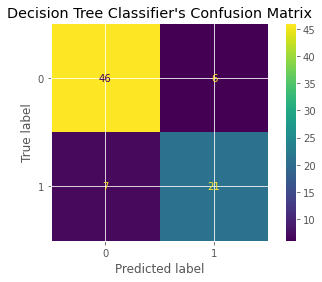

In [44]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Train Score:\n{}\nTest Score\n{}'.format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

y_pred = tree.predict(X_test)
print('\nAccuracy Score : {}'.format(accuracy_score(y_test, y_pred)))

plot_confusion_matrix(tree,X_test, y_test)
plt.title('Decision Tree Classifier\'s Confusion Matrix')

plt.show()

##### Lets look into score for each fold

In [45]:
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(tree, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(tree, X, y, cv=kfold).mean()))



Cross-validation scores:
[0.85  0.9   0.975 1.    0.925 0.7   0.85  0.725 0.825 0.775]
Mean score = 0.8550000000000001


##### Lets look into score for each fold with shuffle=True

In [46]:
kfold = KFold(n_splits=10, shuffle=True)
print("Cross-validation scores:\n{}".format(cross_val_score(tree, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(tree, X, y, cv=kfold).mean()))

Cross-validation scores:
[0.85  0.85  0.8   0.85  0.925 0.9   0.825 0.8   0.9   0.875]
Mean score = 0.8574999999999999


**Observations:**
- Without using Cross validation, DecisionTreeClassifier() showed the test score of around 83.75%. This score got an increase of a percent or two after using cross-validation to around 85%. 
- By analysing the results of each fold, we can see the differences among the test scores of each fold.
- Therefore, we need to consider the score we got through Cross-Validation with shuffle=True


### Random Forest Classifier

<font color=red> Scaling is not required in RandonForest as it is a tree based model

Train Score:
0.996875
Test Score
0.9

Accuracy Score : 0.9


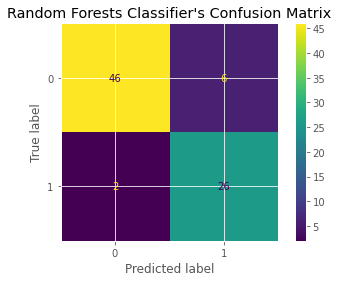

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Score:\n{}\nTest Score\n{}'.format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print('\nAccuracy Score : {}'.format(accuracy_score(y_test, y_pred)))

plot_confusion_matrix(rf ,X_test, y_test)
plt.title('Random Forests Classifier\'s Confusion Matrix')

plt.show()

##### Lets look into score for each fold

In [48]:
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(rf, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(rf, X, y, cv=kfold).mean()))



Cross-validation scores:
[0.95  0.875 0.95  0.95  0.925 0.7   0.925 0.8   0.925 0.875]
Mean score = 0.8925000000000001


##### Lets look into score for each fold with Shuffle=True

In [49]:
kfold = KFold(n_splits=10, shuffle=True)
print("Cross-validation scores:\n{}".format(cross_val_score(rf, X, y, cv=kfold)))
print('Mean score = {}'.format(cross_val_score(rf, X, y, cv=kfold).mean()))

Cross-validation scores:
[0.8   0.9   0.85  0.925 0.925 0.85  0.85  0.825 0.925 0.975]
Mean score = 0.8899999999999999


**Observations:**
- Without using Cross validation, RandomForestClassifier() showed the test score of around 88%. The score remained almost the same after using Cross-Validation
- By analysing the results of each fold, we again see the differences among the test scores of each folds.



## Moving on with the **Random Forest Classifier's** Model

Lets try to improve the score and do the rest of the work on this model

In [50]:
# Lets make the parameters Grid
param_grid = { 
    'rf__n_estimators': [50, 100, 150],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [4,5,6,7,8],
    'rf__criterion' : ['gini', 'entropy']
}

In [51]:
rf_pipe = Pipeline([('rf', RandomForestClassifier())])

In [52]:
# Setting up grid-search metaestimator
rf_grid = GridSearchCV(rf_pipe, param_grid, cv=5)

# Train the grid-search meta-estimator to find the best model
rf_grid.fit(X_train, y_train)

# Print the Test scores
print('Test Set score with Grid Search:\n{}'.format(rf_grid.score(X_test, y_test)))

Test Set score with Grid Search:
0.9375


In [53]:
# Print the best Parameters
print('Best Parameters obtained through GridSearchCV:\n{}'.format(rf_grid.best_params_))

Best Parameters obtained through GridSearchCV:
{'rf__criterion': 'gini', 'rf__max_depth': 4, 'rf__max_features': 'auto', 'rf__n_estimators': 50}


In [54]:
# Print the best Estimators
print("Best Estimator obtained through GridSearchCV:\n{}".format(rf_grid.best_estimator_))

Best Estimator obtained through GridSearchCV:
Pipeline(steps=[('rf', RandomForestClassifier(max_depth=4, n_estimators=50))])


In [55]:
# Print The best CV score, Though not required
print('Best CV score obtained through GridSearchCV:\n{}'.format(rf_grid.best_score_))


Best CV score obtained through GridSearchCV:
0.909375


**Observations:**

- GridSearchCV helped enhancing the scores further. The test score with GridSeachCV is around 91%


- Following parameters were found to be the best performing ones
    - criterion: 'gini', max_depth= 4, max_features: 'auto', 'n_estimators': 100

<font color=red> The results of a grid search can be found in the cv_results_ attribute, which is a dictionary storing all aspects of the search. It is best looked at after converting it to a pandas DataFrame

In [56]:
rf_grid_results = pd.DataFrame(rf_grid.cv_results_)
rf_grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__criterion,param_rf__max_depth,param_rf__max_features,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084763,0.014830,0.006398,0.003199,gini,4,auto,50,"{'rf__criterion': 'gini', 'rf__max_depth': 4, ...",0.9375,0.953125,0.921875,0.859375,0.875,0.909375,0.036174,1
1,0.182335,0.029232,0.007989,0.000005,gini,4,auto,100,"{'rf__criterion': 'gini', 'rf__max_depth': 4, ...",0.9375,0.953125,0.906250,0.859375,0.875,0.906250,0.035630,4
2,0.231891,0.010111,0.017603,0.007831,gini,4,auto,150,"{'rf__criterion': 'gini', 'rf__max_depth': 4, ...",0.9375,0.953125,0.906250,0.859375,0.875,0.906250,0.035630,4
3,0.071959,0.005058,0.006409,0.006000,gini,4,sqrt,50,"{'rf__criterion': 'gini', 'rf__max_depth': 4, ...",0.9375,0.953125,0.921875,0.859375,0.875,0.909375,0.036174,1
4,0.159934,0.018217,0.011185,0.003926,gini,4,sqrt,100,"{'rf__criterion': 'gini', 'rf__max_depth': 4, ...",0.9375,0.953125,0.890625,0.859375,0.875,0.903125,0.036174,18
